# T5 Custom Summarization Project
- Dataset: The CNN/ DailyMail Dataset
- Notes: Summaries are abstractive, not extractive

## 1. Installing dependencies and Importing Dataset

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

import warnings # Don't ignore warnings on production
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.1 MB/s eta 0:00:00
  Attempti

In [2]:
from datasets import load_dataset
dataset = load_dataset('cnn_dailymail', '3.0.0', split='train[:10]')

print(dataset[0]['article'])
print("\nSummary:\n")
print(dataset[0]['highlights'])

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [7]:
dataset

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 10
})

## 2. Test pre-trained Summarization Model for its performance on summarization on the dataset

In [3]:
from transformers import pipeline
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
summary = {}
pipe_t5 = pipeline("summarization", model="t5-small", tokenizer="t5-small", device=device)
output = pipe_t5(dataset[0]['article'])
summary['t5-small'] = output[0]['summary_text']

pipe_bart = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer="facebook/bart-large-cnn", device=device)
output = pipe_bart(dataset[0]['article'])
summary['bart-large-cnn'] = output[0]['summary_text']

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda
Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


In [6]:
for model in summary:
  print()
  print(f"Model: {model}")
  print(f"Summary: {summary[model]}")


Model: t5-small
Summary: the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties . he will be able to gamble in a casino, buy a drink or see the horror film "Hostel: Part II" his agent and publicist had no comment on his plans . his latest outing as the boy wizard is breaking records on both sides of the Atlantic .

Model: bart-large-cnn
Summary: Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund. Details of how he'll mark his landmark birthday are under wraps.


## 3. Fine-Tuning Summarization Model on Custom Dataset
- Dataset: https://huggingface.co/datasets/samsum

In [8]:
samsum = load_dataset('samsum', trust_remote_code=True)
samsum['train'][0]

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [11]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'dialogue_len'}>,
        <Axes: title={'center': 'summary_len'}>]], dtype=object)

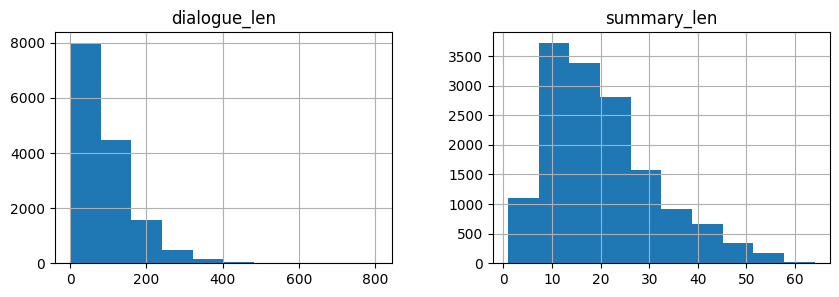

In [14]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['dialogue_len', 'summary_len']

data.hist(figsize=(10, 3))

## 4. Model Loading and Tokenization

In [15]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_ckpt = 't5-small'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

tokenizer(
    samsum['train'][0]['dialogue'],
    text_target=samsum['train'][0]['summary'],
    return_tensors='pt'
)

{'input_ids': tensor([[21542,    10,    27, 13635,  5081,     5,   531,    25,   241,   128,
            58, 16637,    10, 10625,    55, 21542,    10,    27,    31,   195,
           830,    25,  5721,     3,    10,    18,    61,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'labels': tensor([[21542, 13635,  5081,    11,    56,   830, 16637,   128,  5721,     5,
             1]])}

In [16]:
def tokenize(batch):
  encoding=tokenizer(batch['dialogue'],
                     text_target=batch['summary'],
                     max_length=200,
                     padding=True,
                     truncation=True,
                     return_tensors='pt'
                     )
  return encoding

samsum_pt = samsum.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [17]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

## 5. Model Training

In [18]:
from transformers import DataCollatorForSeq2Seq
from transformers import TrainingArguments, Trainer

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

args = TrainingArguments(
    output_dir='train_dir',
    num_train_epochs=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    eval_strategy='epoch',
    save_strategy='epoch',
    weight_decay=0.01,
    learning_rate=2e-5,
    gradient_accumulation_steps=500
)

trainer = Trainer(model=model,
                  args=args,
                  tokenizer=tokenizer,
                  data_collator=data_collator,
                  train_dataset=samsum_pt['train'],
                  eval_dataset=samsum_pt['validation']
                  )

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,13.829119


TrainOutput(global_step=14, training_loss=13.466947283063616, metrics={'train_runtime': 630.9416, 'train_samples_per_second': 46.698, 'train_steps_per_second': 0.022, 'total_flos': 1413264467558400.0, 'train_loss': 13.466947283063616, 'epoch': 1.8145533532446376})

In [19]:
trainer.save_model('t5_samsum_summarization')

## 6. Prediction

In [22]:
from transformers import pipeline
pipe = pipeline('summarization',
                model='t5_samsum_summarization',
                device=device)

custom_dialogue = """
In the bustling heart of New York City, amidst the towering skyscrapers and the
ceaseless hum of urban life, resided a young woman named Emily. Emily, with her
fiery red hair and a spirit as vibrant as the city itself,
was a force to be reckoned with. She possessed an insatiable curiosity,
a relentless drive, and a heart brimming with empathy.
Her days were a whirlwind of activity, juggling her demanding job as a journalist,
her passion for social justice, and her unwavering commitment to her community.
Emily's life was a symphony of chaos and order, a tapestry woven with threads
of ambition, compassion, and an unwavering belief in the power of human connection.
"""

output = pipe(custom_dialogue)
output

Device set to use cuda
Your max_length is set to 200, but your input_length is only 183. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=91)


[{'summary_text': 'a young woman named Emily was a force to be reckoned with . she possessed an insatiable curiosity, a relentless drive, and a heart brimming with empathy . her days were a whirlwind of activity, juggling her demanding job as a journalist .'}]

## Download requirements.txt for local use

In [23]:
!pip freeze > t5_colab_requirements.txt